# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import add_dummy_feature
from scipy import linalg
from sklearn.linear_model import LinearRegression

### Data Loading

In [3]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv("hour.csv")

print the first five rows of dataset

In [4]:
# YOUR CODE HERE
print("Retrieving first 5 rows of hour.csv file: ")
df.head()

Retrieving first 5 rows of hour.csv file: 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [5]:
# YOUR CODE HERE
print("Data types of the columns: ")
print(df.dtypes)

Data types of the columns: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

In [6]:
print("Unique hour count (expected : 0-23): ", df['hr'].unique())

Unique hour count (expected : 0-23):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [7]:
print("Total number of users using bike on shared basis : ", df['cnt'].sum())
print("Identifying users hourly based: ")
df2 = df.groupby(['hr'])['cnt'].sum().reset_index()
print("Total number of users using bike on shared basis per hour (irrespective of season ): ", df2['cnt'].sum())
print("Display user count per hour : ")
df2

Total number of users using bike on shared basis :  3292679
Identifying users hourly based: 
Total number of users using bike on shared basis per hour (irrespective of season ):  3292679
Display user count per hour : 


,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


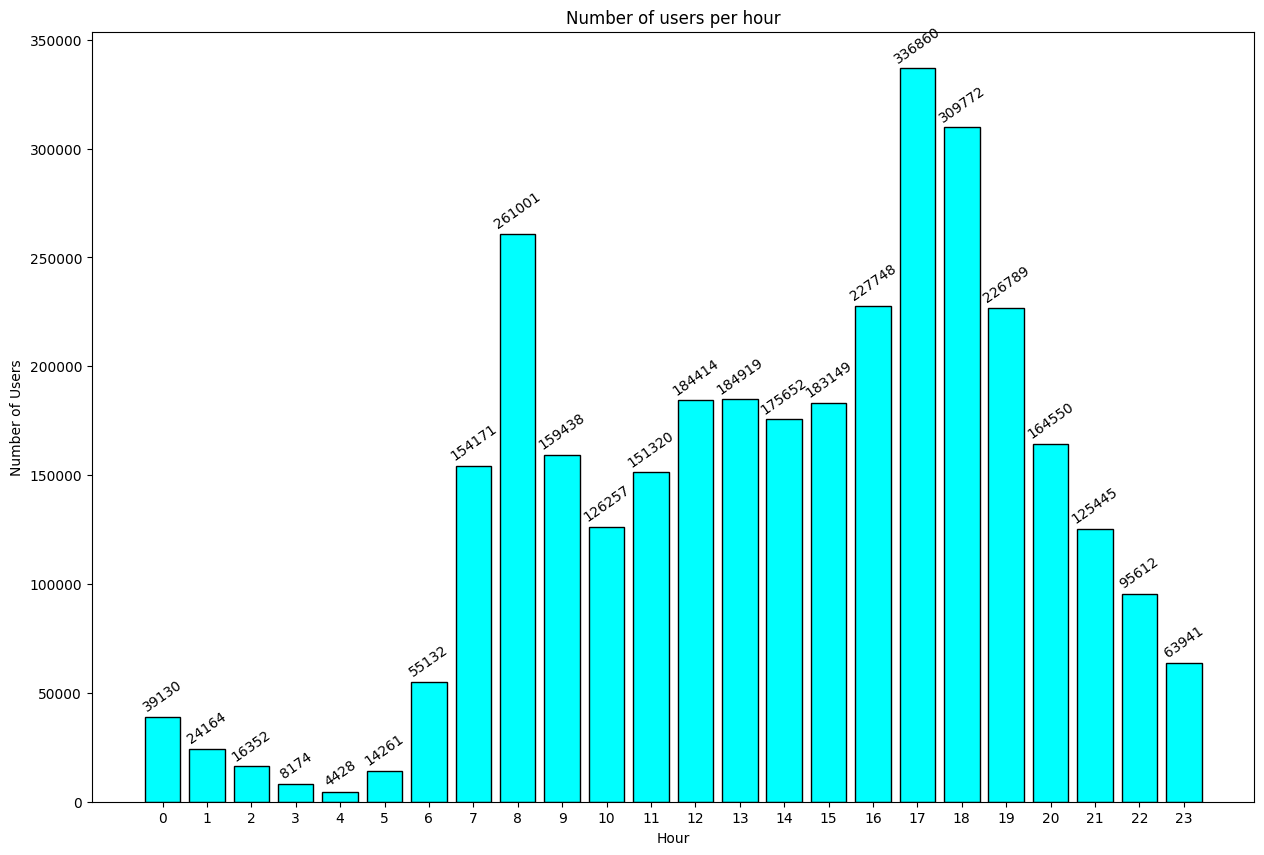

In [8]:
# YOUR CODE HERE
#Using Bar plot

fig, ax = plt.subplots(figsize=(15, 10))
barplot = ax.bar(df2['hr'], df2['cnt'], color='cyan', edgecolor='black')
ax.bar_label(barplot, labels = df2['cnt'], label_type='edge', padding=2, rotation=35)
#ax.xaxis_set_tick_params(rotations=40)
ax.set_xticks(df2['hr'])
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Users")
ax.set_title("Number of users per hour")
plt.show()

In [9]:
print("Average rental users (hourly based): ")
df2_avg = df.groupby(['hr'])['cnt'].mean().reset_index()
df2_avg_sorted = df2_avg.sort_values(by=['cnt'], ascending=False).reset_index()
df2_avg_sorted = df2_avg_sorted.drop(['index'], axis=1)
updated_hr = []
for row in df2_avg_sorted.iterrows():
    temp = str(int(row[1]['hr']) - 12)+'PM' if row[1]['hr'] > 12 else str(int(row[1]['hr']))+'AM'
    updated_hr.append(temp)
df2_avg_sorted = df2_avg_sorted.drop(['hr'], axis=1)
hr_updated = pd.DataFrame({'hr':updated_hr})
df2_avg_sorted = pd.concat([df2_avg_sorted, hr_updated], axis=1)

print("Top 5 Busiest hours")
df2_avg_sorted[['hr', 'cnt']].head()

Average rental users (hourly based): 
Top 5 Busiest hours


,hr,cnt
0,5PM,461.452055
1,6PM,425.510989
2,8AM,359.011004
3,4PM,311.983562
4,7PM,311.523352


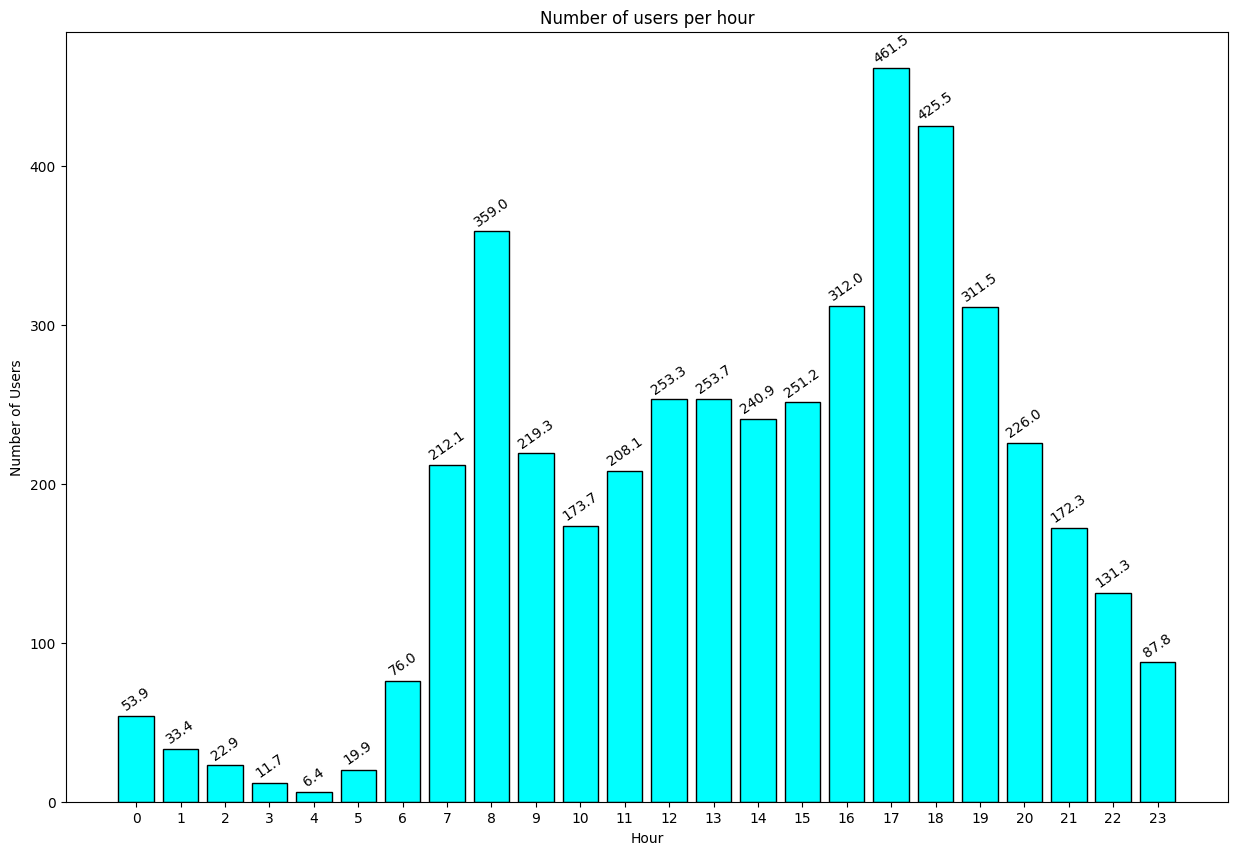

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
barplot = ax.bar(df2_avg['hr'], df2_avg['cnt'], color='cyan', edgecolor='black')
ax.bar_label(barplot, labels = df2_avg['cnt'].round(1), label_type='edge', padding=2, rotation=35)
#ax.xaxis_set_tick_params(rotations=40)
ax.set_xticks(df2_avg['hr'])
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Users")
ax.set_title("Number of users per hour")
plt.show()

In [11]:
print("Total number of users using bike on shared basis : ", df['cnt'].sum())
print("Identifying users hourly based: ")
df3 = df.groupby(['hr', 'season'])['cnt'].sum().reset_index()
print("Total number of users using bike on shared basis per hour (irrespective of season ): ", df3['cnt'].sum())
print("Display user count per hour : ")
df3

Total number of users using bike on shared basis :  3292679
Identifying users hourly based: 
Total number of users using bike on shared basis per hour (irrespective of season ):  3292679
Display user count per hour : 


,hr,season,cnt
0,0,1,4878
1,0,2,10459
2,0,3,13822
3,0,4,9971
4,1,1,3229
...,...,...,...
91,22,4,21871
92,23,1,7994
93,23,2,17661
94,23,3,22986


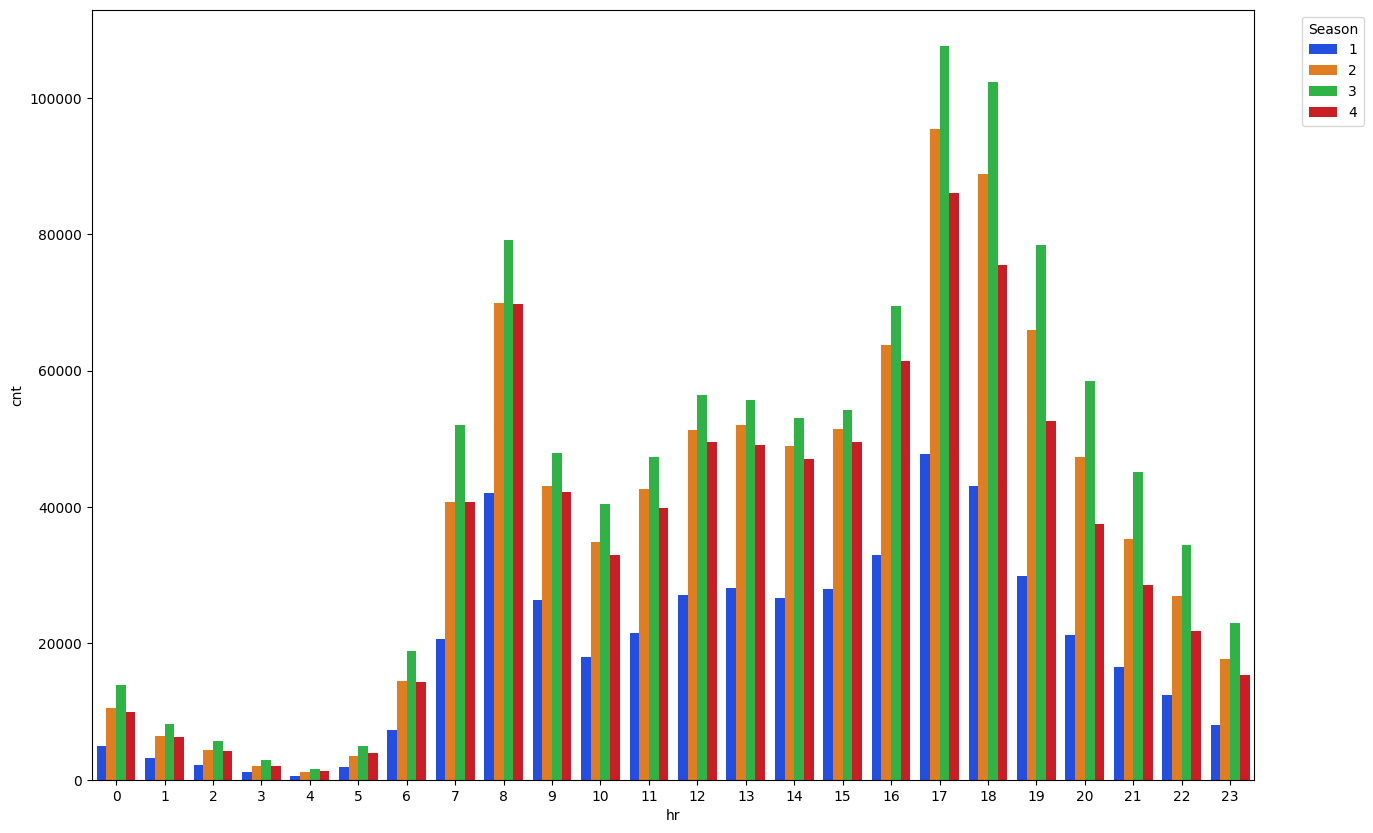

In [12]:
#line plot
plt.figure(figsize=(15, 10))
ax = sns.barplot(x = 'hr', y = 'cnt', hue='season', data = df3,  palette='bright')
plt.legend(title='Season', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()

# Analysis of Bike sharing data based hour

There are total 3292679 users used bike on sharing basis between 2011 and 2012. First analysis i.e. number of users based on hour shows that 17th and 18th hours are the busiest hours with 336860 and 309772 users respectively. This might be due to people returning back home from work or college

### Second analysis - when bifurcated based on season

1:winter, 2:spring, 3:summer, 4:fall

Winter shows very users in every hour compared to remaining three seaons

All four season also indicates 17th and 18th hour are the busiest hour among all hour.


#### Visualize the distribution of count, casual and registered variables

In [13]:
df_cnt = df['cnt'].value_counts().reset_index().sort_values(by='cnt')
print("Printing the row where the count is high")
df_cnt[df_cnt["count"]==df_cnt["count"].max()]

Printing the row where the count is high


,cnt,count
0,5,260


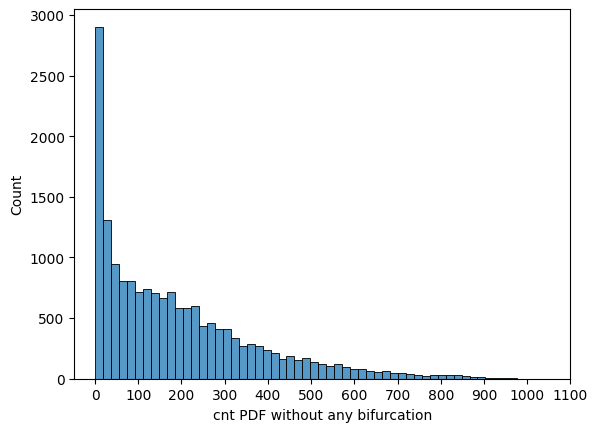

In [14]:
sns.histplot(data=df, x='cnt')
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF without any bifurcation")
plt.show()

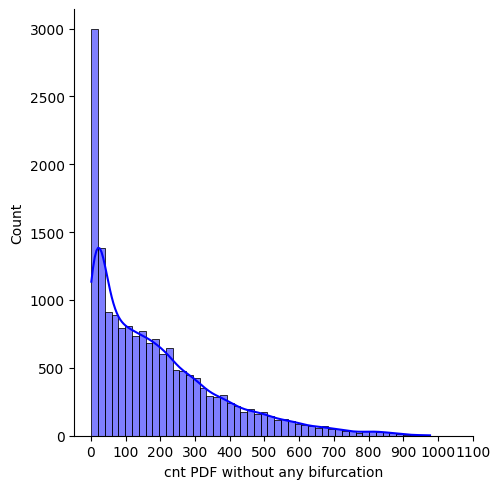

In [140]:
sns.displot(df['cnt'], kde=True, color="blue", bins=50)
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF without any bifurcation")
plt.show()

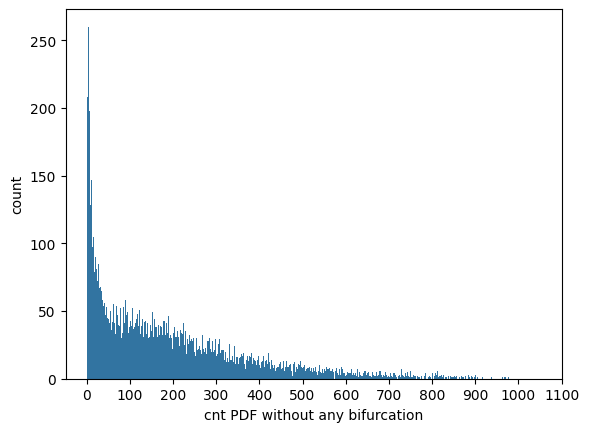

In [15]:
# YOUR CODE HERE for distribuiton of count variable
sns.countplot(data=df, x='cnt', width=1.2, native_scale=True)
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF without any bifurcation")
plt.show()

In [16]:
df4 = df[['cnt', 'yr']].value_counts().reset_index().sort_values(by='cnt')
df4_yr0 = df4[df4['yr']==0]
df4_yr1 = df4[df4['yr']==1]
print("Printing the row where the count is high for year 0")
print(df4_yr0[df4_yr0["count"]==df4_yr0["count"].max()])

print("Printing the row where the count is high for year 1")
df4_yr1[df4_yr1["count"]==df4_yr1["count"].max()]

Printing the row where the count is high for year 0
   cnt  yr  count
0    5   0    143
Printing the row where the count is high for year 1


,cnt,yr,count
5,5,1,117


Density plot of cnt - bifurcated by yr


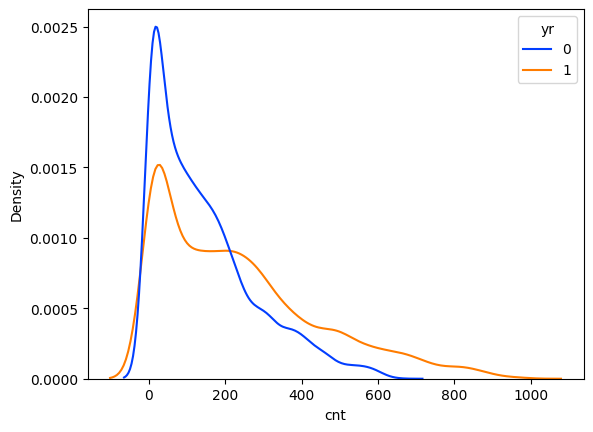

In [17]:
print("Density plot of cnt - bifurcated by yr")
sns.kdeplot(data=df, x='cnt', hue='yr', palette='bright')
plt.xticks(minor=True)
plt.show()


Density plot of cnt - bifurcated by season


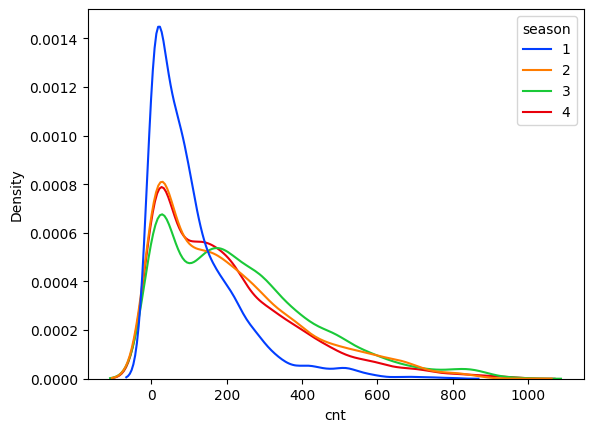

In [18]:
print("Density plot of cnt - bifurcated by season")
sns.kdeplot(data=df, x='cnt', hue='season', palette='bright')
plt.show()

In [19]:
print("Analysis")
print("Mode : ", df['cnt'].mode().values[0])
print("Median : ", df['cnt'].median())
print("Mean: ", df['cnt'].mean())

Analysis
Mode :  5
Median :  142.0
Mean:  189.46308763450142


## Analysis -
Above analysis shows lognormal distribution(right skewed distribution) where count can't be less than 0. It is also satisfying mode < median < mode whether count variable i.e. number of users are analysized by season or year

In [20]:
df_casual = df['casual'].value_counts().reset_index().sort_values(by='casual')
print("Printing the row where the casual user count is high")
df_casual[df_casual["count"]==df_casual["count"].max()]

Printing the row where the casual user count is high


,casual,count
0,0,1581


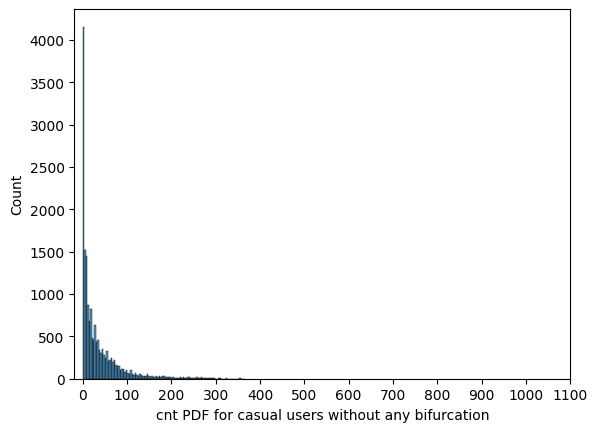

In [21]:
sns.histplot(data=df, x='casual')
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF for casual users without any bifurcation")
plt.show()

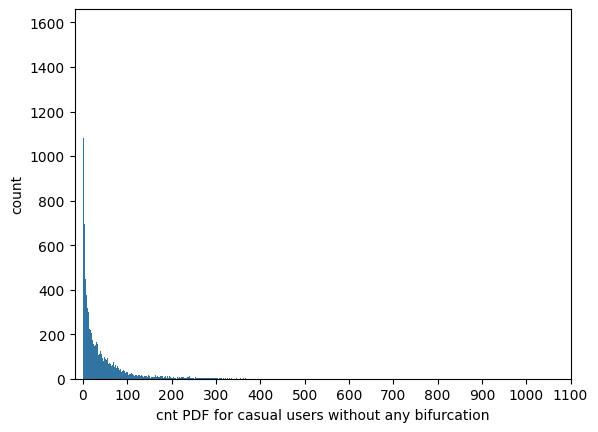

In [22]:
# YOUR CODE HERE for distribuiton of casual variable
sns.countplot(data=df, x='casual', width=1.2, native_scale=True)
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF for casual users without any bifurcation")
plt.show()

Density plot of cnt - bifurcated by yr (for casual variable)


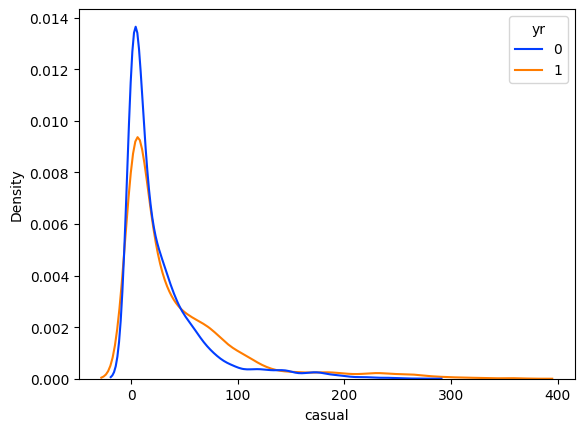

In [23]:
# YOUR CODE HERE for distribuiton of casual variable
print("Density plot of cnt - bifurcated by yr (for casual variable)")
sns.kdeplot(data=df, x='casual', hue='yr', palette='bright')
plt.xticks(minor=True)
plt.show()

Density plot of cnt - bifurcated by season (for casual variable)


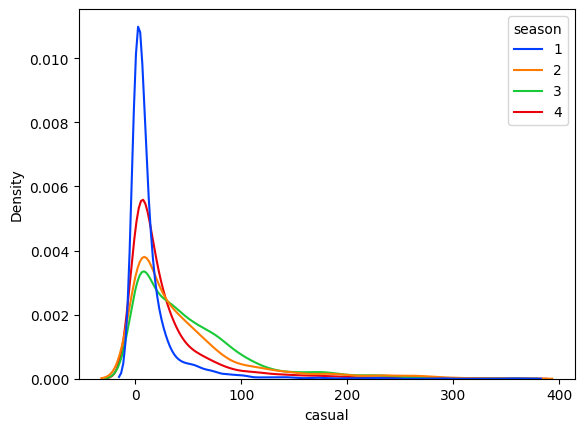

In [24]:
print("Density plot of cnt - bifurcated by season (for casual variable)")
sns.kdeplot(data=df, x='casual', hue='season', palette='bright')
plt.show()

## Analysis -
Above analysis shows similar observation as cnt - log normal distribution



In [25]:
df_registered = df['registered'].value_counts().reset_index().sort_values(by='registered')
print("Printing the row where the casual user count is high")
df_registered[df_registered["count"]==df_registered["count"].max()]

Printing the row where the casual user count is high


,registered,count
0,4,307


In [26]:
df_registered

,registered,count
256,0,24
5,1,201
4,2,245
1,3,294
0,4,307
...,...,...
685,860,1
702,871,1
607,876,2
689,885,1


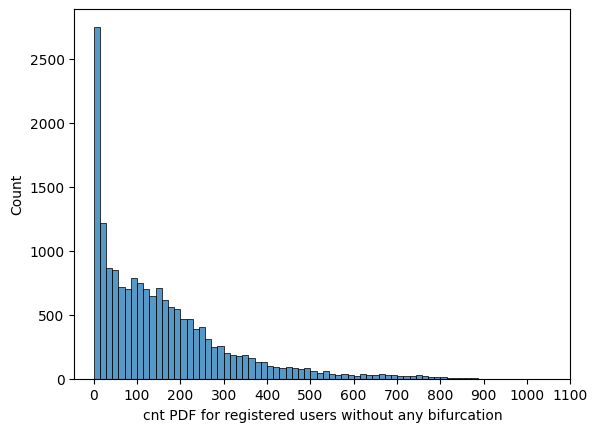

In [27]:
sns.histplot(data=df, x='registered')
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF for registered users without any bifurcation")
plt.show()

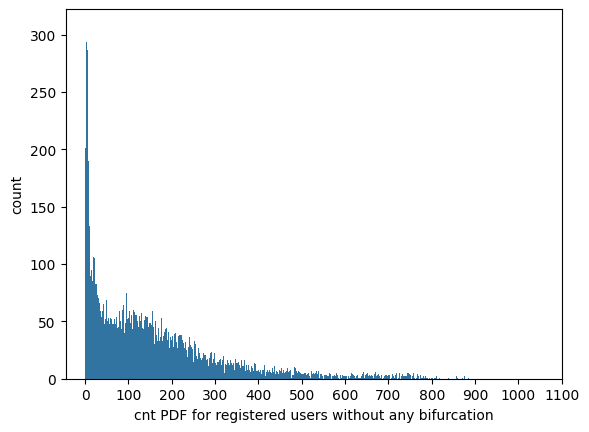

In [28]:
sns.countplot(data=df, x='registered', width=1.2, native_scale=True)
plt.xticks(np.arange(0,1200,100))
plt.xlabel("cnt PDF for registered users without any bifurcation")
plt.show()

Density plot of cnt - bifurcated by yr (for registered variable)


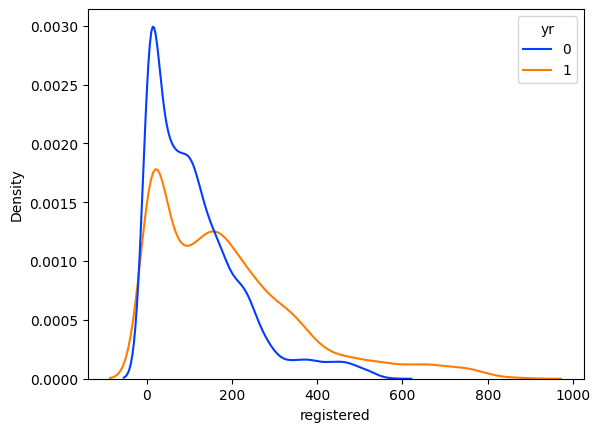

In [29]:
# YOUR CODE HERE for distribuiton of registered variable
print("Density plot of cnt - bifurcated by yr (for registered variable)")
sns.kdeplot(data=df, x='registered', hue='yr', palette='bright')
plt.xticks(minor=True)
plt.show()

Density plot of cnt - bifurcated by season (for registered variable)


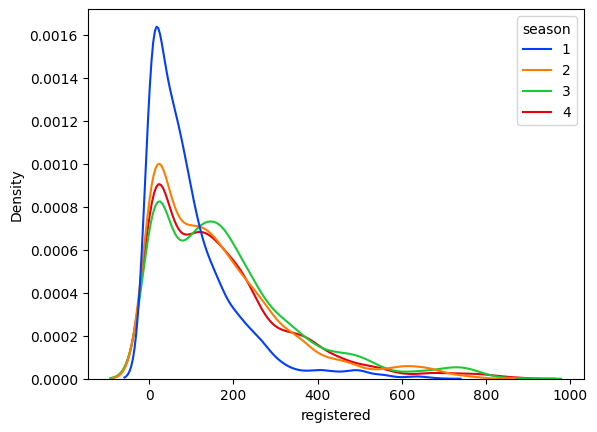

In [30]:
print("Density plot of cnt - bifurcated by season (for registered variable)")
sns.kdeplot(data=df, x='registered', hue='season', palette='bright')
plt.show()

## Analysis -
Above analysis shows similar observation as cnt - log normal distribution

#### Describe the relation of weekday, holiday and working day

In [31]:
df7 = df[['holiday', 'weekday', 'workingday']]
# YOUR CODE HERE
print("When weekday is either 0(Sunday) and 6(saturday) i.e. weekends - expectation holiday and workingday should be False i.e. 0 ")

df_weekday_0 = df[df.weekday == 0]
df_weekend_check = df_weekday_0[(df_weekday_0.holiday == 0) & (df_weekday_0.workingday == 0)]
if df_weekday_0.shape[0] == df_weekday_0.shape[0]:
    print("Condition satifies")

When weekday is either 0(Sunday) and 6(saturday) i.e. weekends - expectation holiday and workingday should be False i.e. 0 
Condition satifies


In [32]:
# YOUR CODE HERE
print("When weekday is between 1-5 (mon-friday) - when holiday is True then working day should be False and vice versa ")

df_weekday = df[~(df['weekday'].isin([0, 6]))]
holiday_and_noworkingday = (df_weekday.holiday==1) & (df_weekday.workingday==0)
noholiday_and_workingday = (df_weekday.holiday==0) & (df_weekday.workingday==1)

df_weekday_holiday = df_weekday[holiday_and_noworkingday]
df_weekday_workingday = df_weekday[noholiday_and_workingday]
if df_weekday.shape[0] == df_weekday_holiday.shape[0] + df_weekday_workingday.shape[0]:
    print("Condition satifies")

print("Number of weekdays when no holidays: ", df_weekday_workingday.shape[0])
print("Number of weekdays when holidays: ", df_weekday_holiday.shape[0])
print("Total number of weekdays (1-5) : ", df_weekday.shape[0])

When weekday is between 1-5 (mon-friday) - when holiday is True then working day should be False and vice versa 
Condition satifies
Number of weekdays when no holidays:  11865
Number of weekdays when holidays:  500
Total number of weekdays (1-5) :  12365


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

In [33]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [34]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [35]:
df['yr'].unique()

array([0, 1])

In [36]:
df_2011 = df[df['yr'] == 0]
df_2011_mnthwise = df_2011.groupby(['mnth'])[['casual', 'registered']].sum().reset_index()
df_2011_mnthwise

,mnth,casual,registered
0,1,3073,35116
1,2,6242,41973
2,3,12826,51219
3,4,22346,72524
4,5,31050,104771
5,6,30612,112900
6,7,36452,104889
7,8,28842,107849
8,9,26545,100873
9,10,25222,98289


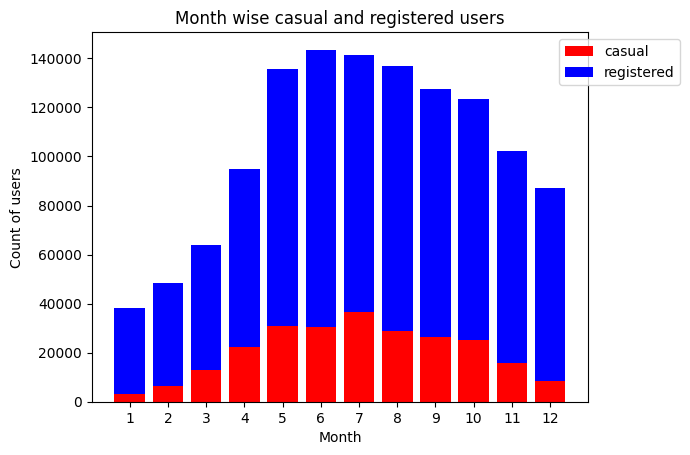

In [37]:
# stacked bar chart for year 2011
# YOUR CODE HERE
plt.bar(df_2011_mnthwise["mnth"].values, df_2011_mnthwise["casual"].values, color='red', label='casual')
plt.bar(df_2011_mnthwise["mnth"].values, df_2011_mnthwise["registered"].values, bottom = df_2011_mnthwise["casual"].values, color='blue', label='registered' )
plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.legend(bbox_to_anchor=(1.2, 1))
plt.xticks(np.arange(1,13))
plt.show()

In [38]:
df_2012 = df[df['yr'] == 1]
df_2012_mnthwise = df_2012.groupby(['mnth'])[['casual', 'registered']].sum().reset_index()
df_2012_mnthwise

,mnth,casual,registered
0,1,8969,87775
1,2,8721,94416
2,3,31618,133257
3,4,38456,135768
4,5,44235,151630
5,6,43294,159536
6,7,41705,161902
7,8,43197,171306
8,9,43778,174795
9,10,34538,164303


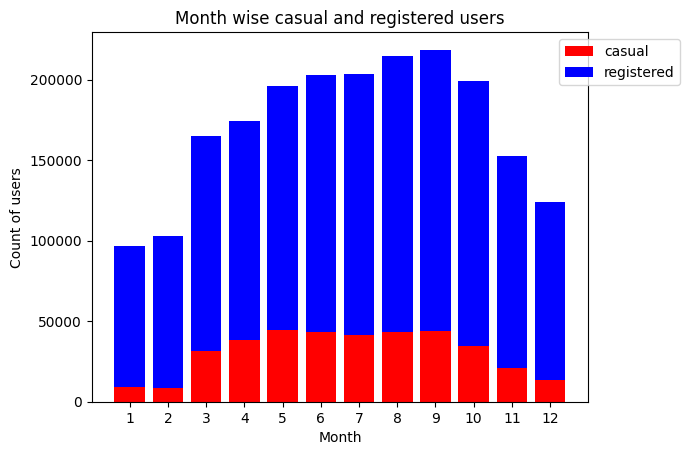

In [39]:
# stacked bar chart for year 2012
# YOUR CODE HERE
plt.bar(df_2012_mnthwise["mnth"].values, df_2012_mnthwise["casual"].values, color='red', label='casual')
plt.bar(df_2012_mnthwise["mnth"].values, df_2012_mnthwise["registered"].values, bottom = df_2012_mnthwise["casual"].values, color='blue', label='registered' )
plt.xlabel("Month")
plt.ylabel("Count of users")
plt.title("Month wise casual and registered users")
plt.legend(bbox_to_anchor=(1.2, 1))
plt.xticks(np.arange(1,13))
plt.show()

#### Analyze the correlation between features with heatmap

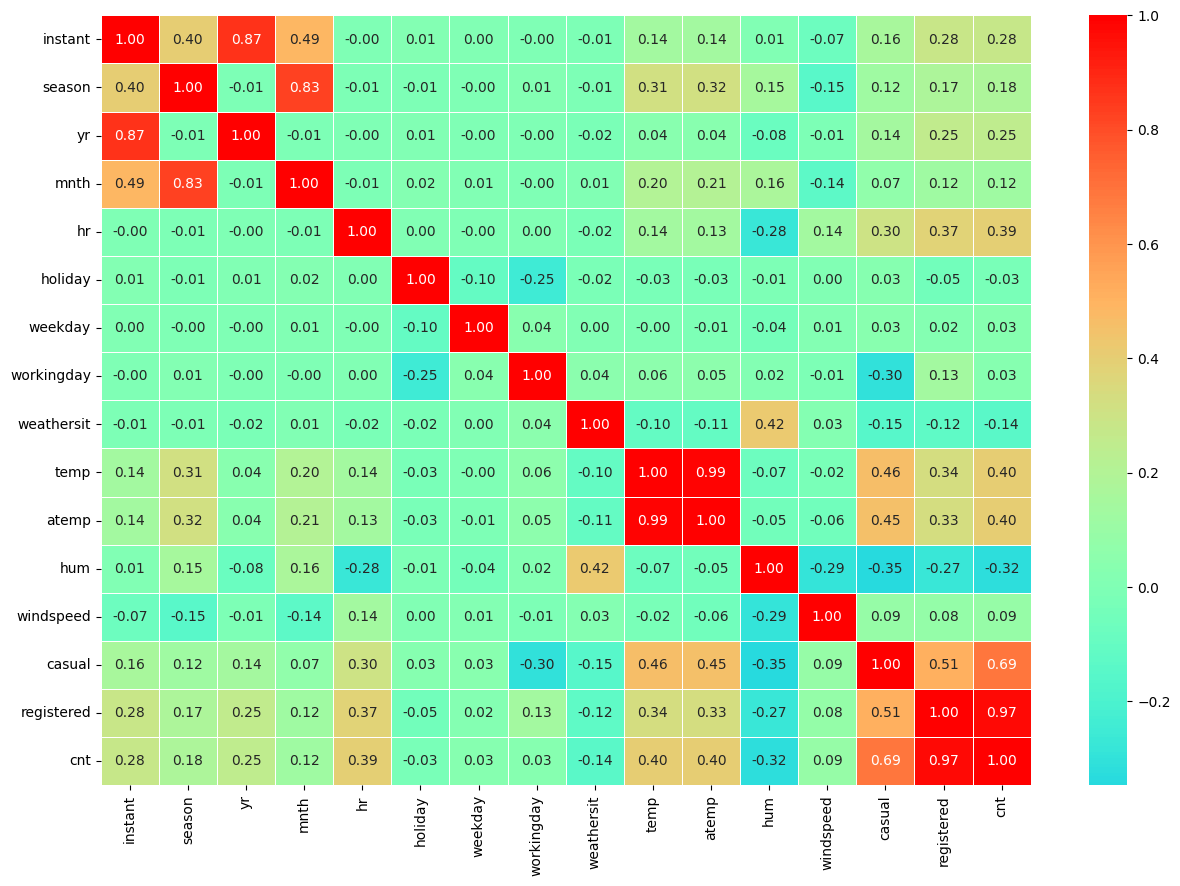

In [40]:
df_heatmap = df.drop(['dteday'], axis=1)
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap.corr(),
            annot=True,
            linewidth=0.5,
            center=0,
            cmap='rainbow',
            fmt='.2f')
plt.show()

In [41]:
df_heatmap.corr()['cnt'].sort_values()

,cnt
hum,-0.322911
weathersit,-0.142426
holiday,-0.030927
weekday,0.026900
workingday,0.030284
windspeed,0.093234
mnth,0.120638
season,0.178056
yr,0.250495
instant,0.278379


## Analysis :


1. dteday has no impact on cnt and no correlation with any other features
2. temp and atemp are highly correlated : 0.97
3. instant has also no signifance



#### Visualize the box plot of casual and registered variables to check the outliers

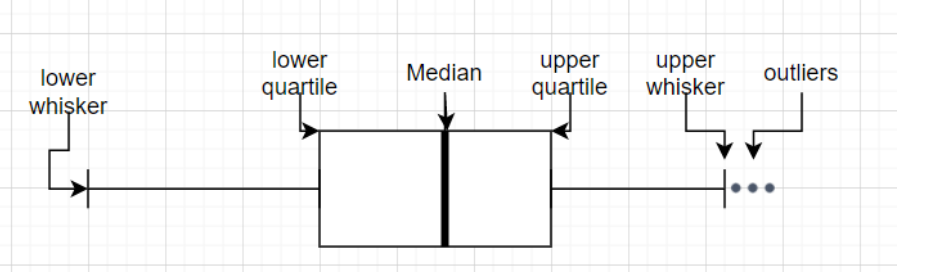

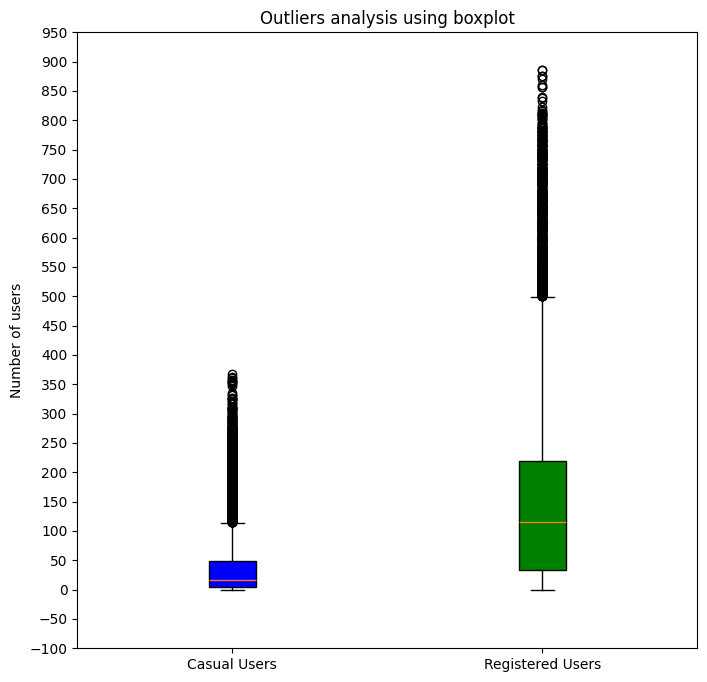

In [42]:
# YOUR CODE HERE
plt.figure(figsize = (8,8))
bplot = plt.boxplot([df['casual'].values, df['registered'].values], patch_artist=True)
plt.xticks([1, 2], ['Casual Users', 'Registered Users'])
for patch, color in zip(bplot['boxes'], ['blue', 'green']):
    patch.set_facecolor(color)
plt.yticks(np.arange(-100,1000, 50))
plt.ylabel("Number of users")
plt.title("Outliers analysis using boxplot")
fig.tight_layout()
plt.show()

In [43]:
#Finding the median, quartile, and interquartile regions
#Calculate 1.5*IQR below the first quartile and check for low outliers.
#Calculate 1.5*IQR above the third quartile and check for outliers.

# finding the 1st quartile
q1 = np.quantile(df['casual'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(df['casual'], 0.75)
med = np.median(df['casual'])

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = df['casual'][(df['casual'] <= lower_bound) | (df['casual'] >= upper_bound)]
print("Upper bound: ", upper_bound)
print("Lower bound: ", lower_bound)
print("Total outlier count in casual distribution : ", outliers.shape[0])
print("Outliers information : ")
outliers

Upper bound:  114.0
Lower bound:  -62.0
Total outlier count in casual distribution :  1209
Outliers information : 


,casual
1633,144
1634,149
1635,124
1771,126
1772,174
...,...
16817,122
16818,148
16819,164
16820,167


In [44]:
#Finding the median, quartile, and interquartile regions
#Calculate 1.5*IQR below the first quartile and check for low outliers.
#Calculate 1.5*IQR above the third quartile and check for outliers.

# finding the 1st quartile
q1 = np.quantile(df['registered'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(df['registered'], 0.75)
med = np.median(df['registered'])

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = df['registered'][(df['registered'] <= lower_bound) | (df['registered'] >= upper_bound)]
print("Upper bound: ", upper_bound)
print("Lower bound: ", lower_bound)
print("Total outlier count in registered distribution : ", outliers.shape[0])
print("Outliers information : ")
outliers

Upper bound:  499.0
Lower bound:  -245.0
Total outlier count in registered distribution :  683
Outliers information : 


,registered
2995,539
3019,532
3067,540
3187,521
3379,524
...,...
17063,512
17077,665
17086,536
17087,546


## Analysis
Registered distribution has more outliers than casual distribution.
Outliers can be viewed using boxplot. data lies above upper bound and data lies below lower bound are outliers

Outliers are mostly lied above upper bound because distribution is log normal means count is floored to zero

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [45]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [46]:
# YOUR CODE HERE
df_updated = df.drop(['dteday', 'instant', 'temp'], axis=1)
df_updated.sample(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
6571,4,0,10,9,0,4,1,1,0.4545,0.63,0.1940,20,188,208
5764,3,0,9,15,0,5,1,2,0.6515,0.61,0.2537,69,277,346
14005,3,1,8,18,0,6,0,2,0.6667,0.74,0.2985,107,193,300
4187,3,0,6,9,0,2,1,1,0.6970,0.70,0.0000,38,208,246
14903,3,1,9,4,0,2,1,2,0.5455,0.94,0.3582,2,5,7


#### Identify categorical and continuous variables


In [47]:
df_updated.dtypes

,0
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
atemp,float64
hum,float64


In [48]:
# YOUR CODE HERE
continuous_variables = ['atemp', 'hum', 'windspeed', 'cnt', 'casual', 'registered']
categorical_variables =['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [49]:
# YOUR CODE HERE
print("Using StandardScalar")
standard_scalar_df = df_updated.copy()
features = standard_scalar_df[continuous_variables]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
standard_scalar_df[continuous_variables] = features
print("Dataset post applying StandardScalar on continuous variables")
standard_scalar_df.head(10)

Using StandardScalar
Dataset post applying StandardScalar on continuous variables


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,1,0,1,1,0,6,0,1,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,1,0,1,2,0,6,0,1,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,1,0,1,3,0,6,0,1,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,1,0,1,4,0,6,0,1,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037
5,1,0,1,5,0,6,0,2,-1.269602,0.636370,-0.821484,-0.723603,-1.009474,-1.039037
6,1,0,1,6,0,6,0,1,-1.181732,0.895539,-1.553889,-0.683038,-1.016081,-1.033524
7,1,0,1,7,0,6,0,1,-1.269602,1.206542,-1.553889,-0.703320,-1.002867,-1.028011
8,1,0,1,8,0,6,0,1,-1.093281,0.636370,-1.553889,-0.703320,-0.969832,-1.000445
9,1,0,1,9,0,6,0,1,-0.740638,0.688203,-1.553889,-0.561343,-0.976439,-0.967366


In [50]:
print("Using MinMaxScaler")
minmax_scalar_df = df_updated.copy()
features = minmax_scalar_df[continuous_variables]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
minmax_scalar_df[continuous_variables] = features
print("Dataset post applying MinMaxScaler on continuous variables")
minmax_scalar_df.head(10)

Using MinMaxScaler
Dataset post applying MinMaxScaler on continuous variables


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.2879,0.81,0.000000,0.008174,0.014673,0.015369
1,1,0,1,1,0,6,0,1,0.2727,0.80,0.000000,0.021798,0.036117,0.039959
2,1,0,1,2,0,6,0,1,0.2727,0.80,0.000000,0.013624,0.030474,0.031762
3,1,0,1,3,0,6,0,1,0.2879,0.75,0.000000,0.008174,0.011287,0.012295
4,1,0,1,4,0,6,0,1,0.2879,0.75,0.000000,0.000000,0.001129,0.000000
5,1,0,1,5,0,6,0,2,0.2576,0.75,0.105325,0.000000,0.001129,0.000000
6,1,0,1,6,0,6,0,1,0.2727,0.80,0.000000,0.005450,0.000000,0.001025
7,1,0,1,7,0,6,0,1,0.2576,0.86,0.000000,0.002725,0.002257,0.002049
8,1,0,1,8,0,6,0,1,0.2879,0.75,0.000000,0.002725,0.007901,0.007172
9,1,0,1,9,0,6,0,1,0.3485,0.76,0.000000,0.021798,0.006772,0.013320


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [51]:
df_updated = minmax_scalar_df.copy()

In [52]:
# YOUR CODE HERE
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_updated[categorical_variables])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_variables))
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_updated, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_variables, axis=1)
df_encoded.sample(10)

,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
10806,0.4091,0.76,0.228047,0.168937,0.181716,0.227459,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9281,0.4697,0.51,0.386035,0.073569,0.191874,0.200820,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10714,0.3485,0.27,0.000000,0.125341,0.186230,0.215164,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
16586,0.3333,0.36,0.157870,0.013624,0.291196,0.268443,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7880,0.3333,0.62,0.491243,0.002725,0.025959,0.023566,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
758,0.2576,0.44,0.000000,0.008174,0.011287,0.012295,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
13665,0.7727,0.39,0.298225,0.506812,0.347630,0.505123,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
13808,0.8030,0.47,0.333373,0.267030,0.278781,0.352459,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8411,0.4394,0.67,0.193018,0.000000,0.006772,0.005123,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
15056,0.6212,0.31,0.350888,0.217984,0.279910,0.335041,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Specify features and targets after applying scaling and one-hot encoding

In [53]:
# YOUR CODE HERE
targets = ['cnt', 'casual', 'registered']
features = list(set(df_encoded.columns) - set(targets))
print("targets: ", targets)
print("Features: ", features)

targets:  ['cnt', 'casual', 'registered']
Features:  ['season_2', 'hr_4', 'mnth_5', 'weekday_0', 'holiday_1', 'yr_0', 'mnth_3', 'hr_7', 'hr_16', 'weathersit_3', 'hr_10', 'mnth_9', 'hr_22', 'mnth_11', 'season_4', 'yr_1', 'hr_14', 'windspeed', 'mnth_6', 'holiday_0', 'mnth_10', 'hr_20', 'hum', 'hr_9', 'hr_21', 'hr_2', 'weekday_5', 'hr_11', 'hr_15', 'hr_5', 'season_3', 'weekday_1', 'mnth_12', 'hr_13', 'hr_0', 'hr_17', 'hr_18', 'weathersit_1', 'workingday_0', 'weekday_6', 'hr_12', 'hr_3', 'mnth_1', 'mnth_2', 'mnth_7', 'hr_1', 'season_1', 'mnth_4', 'hr_23', 'weekday_2', 'weekday_3', 'workingday_1', 'atemp', 'weekday_4', 'hr_19', 'hr_8', 'hr_6', 'weathersit_4', 'weathersit_2', 'mnth_8']


### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [54]:
# YOUR CODE HERE
targets = ['cnt']
X = df_encoded.drop(['casual', 'registered', 'cnt'], axis=1)
y = df_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 60), (3476, 60), (13903,), (3476,))

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [55]:
# YOUR CODE HERE
#Add intercept
#Check with mentors difference between inv and solve
X_train_with_intercept = add_dummy_feature(X_train, 1)
model_parameters_theta = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train
model_parameters_theta

array([ 2.31059493e+14, -1.51143632e+00, -2.57153645e+00, -5.69249740e+00,
        5.12422409e+14,  5.12422409e+14,  5.12422409e+14,  5.12422409e+14,
       -2.40788765e+14, -2.40788765e+14, -5.10060330e+14, -5.10060330e+14,
       -5.10060330e+14, -5.10060330e+14, -5.10060330e+14, -5.10060330e+14,
       -5.10060330e+14, -5.10060330e+14, -5.10060330e+14, -5.10060330e+14,
       -5.10060330e+14, -5.10060330e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14,  1.07705150e+14,  1.07705150e+14,
        1.07705150e+14,  1.07705150e+14, -1.56940287e+13,  1.08814795e+14,
       -3.57407350e+12, -1.28082897e+14, -1.28082897e+14, -1.28082897e+14,
       -1.28082897e+14, -

In [56]:
X_test_with_intercept = add_dummy_feature(X_test, 1)
y_pred = X_test_with_intercept @ model_parameters_theta
y_pred

array([-1.90524824,  0.76662676,  1.03125   , ...,  1.12075956,
       -2.54587324,  0.11037676])

In [58]:
#MeanSquared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))
print("R2 score: ", r2_score(y_test, y_pred))

Mean Squared Error:  3.7649126445444825
RMSE:  1.9403382809563086
R2 score:  -112.25813485203597


In [59]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train_with_intercept, y_train, rcond=1e-6)

In [61]:
y_pred_using_scipy = X_test_with_intercept @ theta_best_svd
y_pred_using_scipy

array([0.45363897, 0.16463083, 0.00457293, ..., 0.08734179, 0.2033594 ,
       0.26197937])

In [62]:
mse_using_scipy = mean_squared_error(y_test, y_pred_using_scipy)
print("Mean Squared Error: ", mse_using_scipy)
print("RMSE: ", np.sqrt(mse_using_scipy))
print("R2 score: ", r2_score(y_test, y_pred_using_scipy))

Mean Squared Error:  0.010603570216713362
RMSE:  0.10297363845525398
R2 score:  0.6810176758661937


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [116]:
errs_1_eta1 = []
eta = 0.1           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta1.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final = theta_parameters

Iteration :  0
MSE:  4.617457852775927
Iteration :  500
MSE:  0.014236411797976729
Iteration :  1000
MSE:  0.012107918851272907
Iteration :  1500
MSE:  0.011531941597296473
Iteration :  2000
MSE:  0.011296224635754472
Iteration :  2500
MSE:  0.01119192783568099


In [117]:
errs_1_eta1[-1]

0.011143107301616257

In [118]:
errs_1_eta2 = []
eta = 0.01           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta2.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final2 = theta_parameters

Iteration :  0
MSE:  4.617457852775927
Iteration :  500
MSE:  0.5115052062038667
Iteration :  1000
MSE:  0.19115233208945162
Iteration :  1500
MSE:  0.08716635973779206
Iteration :  2000
MSE:  0.04671297163515532
Iteration :  2500
MSE:  0.029503917018044987


In [119]:
errs_1_eta2[-1]

0.02172813473235254

In [123]:
errs_1_eta3 = []
eta = 0.0001           # learning rate
np.random.seed(42)
theta_parameters = np.random.randn(X_train.shape[1])
for iteration in range(3000):
    const = - 2.0/len(y_train)
    y_pred_gd = X_train @ theta_parameters
    error = y_train - y_pred_gd
    gradient = const * (X_train.T @ error)
    theta_parameters = theta_parameters - eta * gradient
    error = mean_squared_error(y_train, y_pred_gd)
    errs_1_eta3.append(error)
    if iteration%500 == 0:
        print('Iteration : ', iteration)
        print("MSE: ", error)
theta_parameters_final3 = theta_parameters

Iteration :  0
MSE:  4.617457852775927
Iteration :  500
MSE:  4.290066388933746
Iteration :  1000
MSE:  4.0324950768552466
Iteration :  1500
MSE:  3.815358652480156
Iteration :  2000
MSE:  3.624135328885307
Iteration :  2500
MSE:  3.4513957462332456


In [120]:
#Prediction of X_test
y_pred_test = X_test @ theta_parameters_final
mse_gd = mean_squared_error(y_test, y_pred_test)
metric_df_sd = pd.DataFrame({'MSE': [mse_gd], 'RMSE': [np.sqrt(mse_gd)], "R2 score": [r2_score(y_test, y_pred_test)]})
metric_df_sd

,MSE,RMSE,R2 score
0,0.010857,0.104196,0.673397


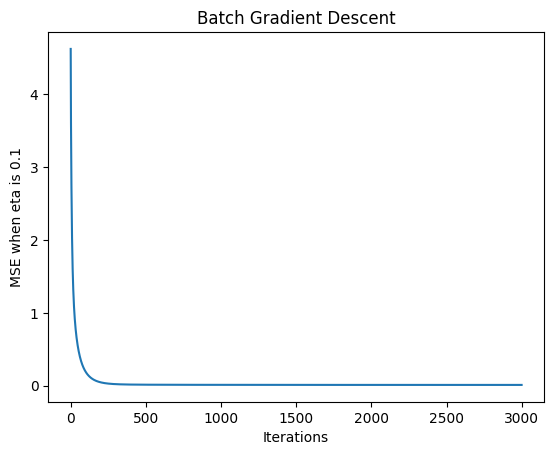

In [121]:
plt.plot(np.arange(3000), errs_1_eta1 )
plt.xlabel("Iterations")
plt.ylabel("MSE when eta is 0.1")
plt.title("Batch Gradient Descent")
plt.show()

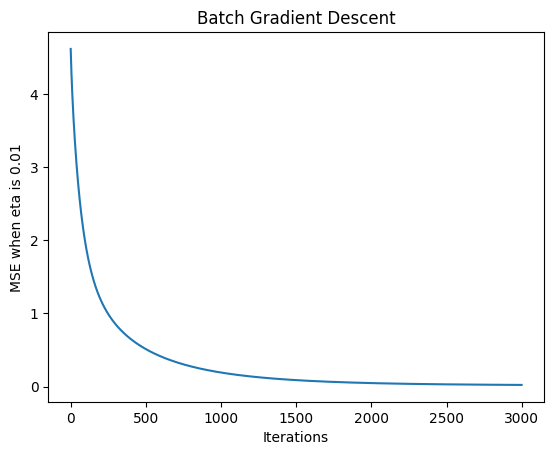

In [122]:
plt.plot(np.arange(3000), errs_1_eta2 )
plt.xlabel("Iterations")
plt.ylabel("MSE when eta is 0.01")
plt.title("Batch Gradient Descent")
plt.show()

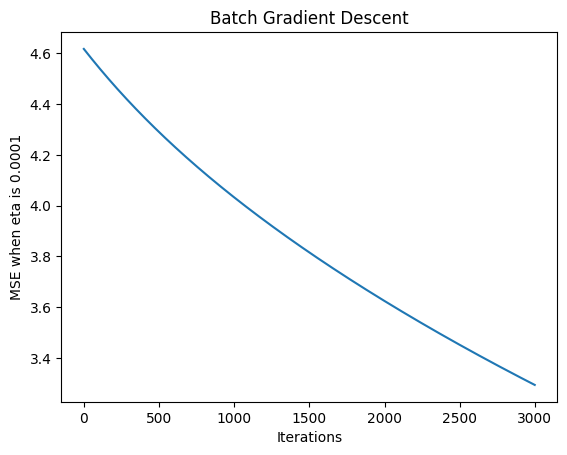

In [124]:
plt.plot(np.arange(3000), errs_1_eta3 )
plt.xlabel("Iterations")
plt.ylabel("MSE when eta is 0.0001")
plt.title("Batch Gradient Descent")
plt.show()

## Analysis

eta : 0.0001 : Learning rate is low and hence taking lot of time to converage

eta : 0.01 : Better than 0.0001

eta : 0.1 : MSE is least and coverage better

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [132]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha = 0.01, learning_rate='constant', random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_eta1 = sgd_reg.predict(X_test)
mse_eta1 = mean_squared_error(y_test, y_pred_eta1)
rmse_eta1 = np.sqrt(mse_eta1)
r2_eta1 = r2_score(y_test, y_pred_eta1)
sgd_metrics_df = pd.DataFrame({"MSE": [mse_eta1], "RMSE": [rmse_eta1], "R2 score": [r2_eta1]})
sgd_metrics_df

,MSE,RMSE,R2 score
0,0.011443,0.106971,0.655771


In [133]:
sgd_reg = SGDRegressor(alpha = 0.1, learning_rate='constant', random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_eta1 = sgd_reg.predict(X_test)
mse_eta1 = mean_squared_error(y_test, y_pred_eta1)
rmse_eta1 = np.sqrt(mse_eta1)
r2_eta1 = r2_score(y_test, y_pred_eta1)
sgd_metrics_df = pd.DataFrame({"MSE": [mse_eta1], "RMSE": [rmse_eta1], "R2 score": [r2_eta1]})
sgd_metrics_df

,MSE,RMSE,R2 score
0,0.019294,0.138902,0.419591


In [134]:
sgd_reg = SGDRegressor(alpha = 0.0001, learning_rate='constant', random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_eta1 = sgd_reg.predict(X_test)
mse_eta1 = mean_squared_error(y_test, y_pred_eta1)
rmse_eta1 = np.sqrt(mse_eta1)
r2_eta1 = r2_score(y_test, y_pred_eta1)
sgd_metrics_df = pd.DataFrame({"MSE": [mse_eta1], "RMSE": [rmse_eta1], "R2 score": [r2_eta1]})
sgd_metrics_df

,MSE,RMSE,R2 score
0,0.010842,0.104125,0.673845


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [124]:
# YOUR CODE HERE
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
coefficients = lin_reg.coef_
y_pred_using_model = lin_reg.predict(X_test)
metrics_dict = {}
mse2 = mean_squared_error(y_test, y_pred_using_model)
r2 = r2_score(y_test, y_pred_using_model)
metrics_dict['MSE'] = [mse2]
rmse = np.sqrt(mse2)
metrics_dict['RMSE'] = [rmse]
metrics_dict['R2 Score'] = [r2]
metrics_df_lin_reg = pd.DataFrame(metrics_dict)
metrics_df_lin_reg

,MSE,RMSE,R2 Score
0,0.010604,0.102974,0.681018


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [123]:
r2 = r2_score(y_test, y_pred_using_model)
print("R2 score: ", r2)

R2 score:  0.6810176758661934


In [118]:
print("Linear Regression Bias: ", lin_reg.intercept_)
print("Linear Regression Coefficents/Weights : ", coefficients)
print("Predicted Value : ", y_pred_using_model)

Linear Regression Bias:  0.08327476928667216
Linear Regression Coefficents/Weights :  [ 0.23965679 -0.08512075 -0.02141831 -0.03414959  0.00027054 -0.002278
  0.03615705 -0.04421207  0.04421207 -0.01188636 -0.00937917  0.0050166
  0.00197174  0.01795501  0.00742798 -0.01356494  0.00584115  0.03113025
  0.00757474 -0.02284114 -0.01924586 -0.12882291 -0.14616369 -0.15686263
 -0.16724206 -0.16980976 -0.15140866 -0.093332    0.046981    0.19485953
  0.03931578 -0.01437867  0.008965    0.05285253  0.04852044  0.02668534
  0.03612394  0.10382883  0.26466573  0.22305991  0.11348602  0.03519703
 -0.01660877 -0.05496128 -0.09495065  0.00914563 -0.00914563 -0.00580802
 -0.00491786 -0.00288285 -0.00054861 -0.00128853  0.00435825  0.01108762
 -0.00386603  0.00386603  0.05197514  0.04076544 -0.01381533 -0.07892525]
Predicted Value :  [0.45363897 0.16463083 0.00457293 ... 0.08734179 0.2033594  0.26197937]


In [131]:
act_pred_df = pd.DataFrame({'Actuals': y_test, 'Predicted': y_pred_using_model})
act_pred_df

,Actuals,Predicted
12830,0.434426,0.453639
8688,0.089139,0.164631
7091,0.003074,0.004573
12230,0.537910,0.438681
431,0.012295,-0.075063
...,...,...
6759,0.016393,0.032464
13989,0.086066,0.047074
173,0.099385,0.087342
16192,0.271516,0.203359


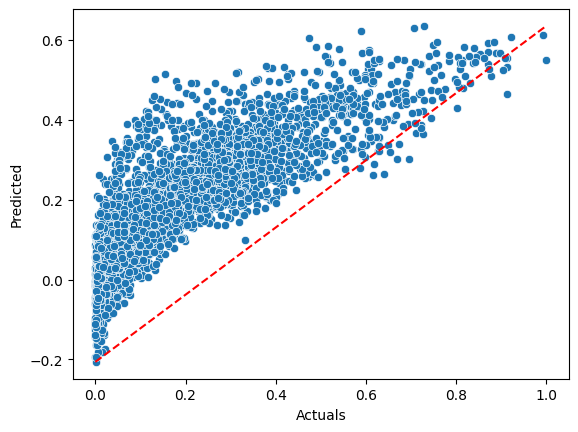

In [136]:
sns.scatterplot(data=act_pred_df, x='Actuals', y='Predicted')
plt.plot([act_pred_df['Actuals'].min(), act_pred_df['Actuals'].max()], [act_pred_df['Predicted'].min(), act_pred_df['Predicted'].max()], 'r--', label='Best fit line')
plt.show()

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

In [143]:
y_value = coefficients
x_value = X_test.columns

<ipython-input-144-06166e66657f>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_value, rotation=50)


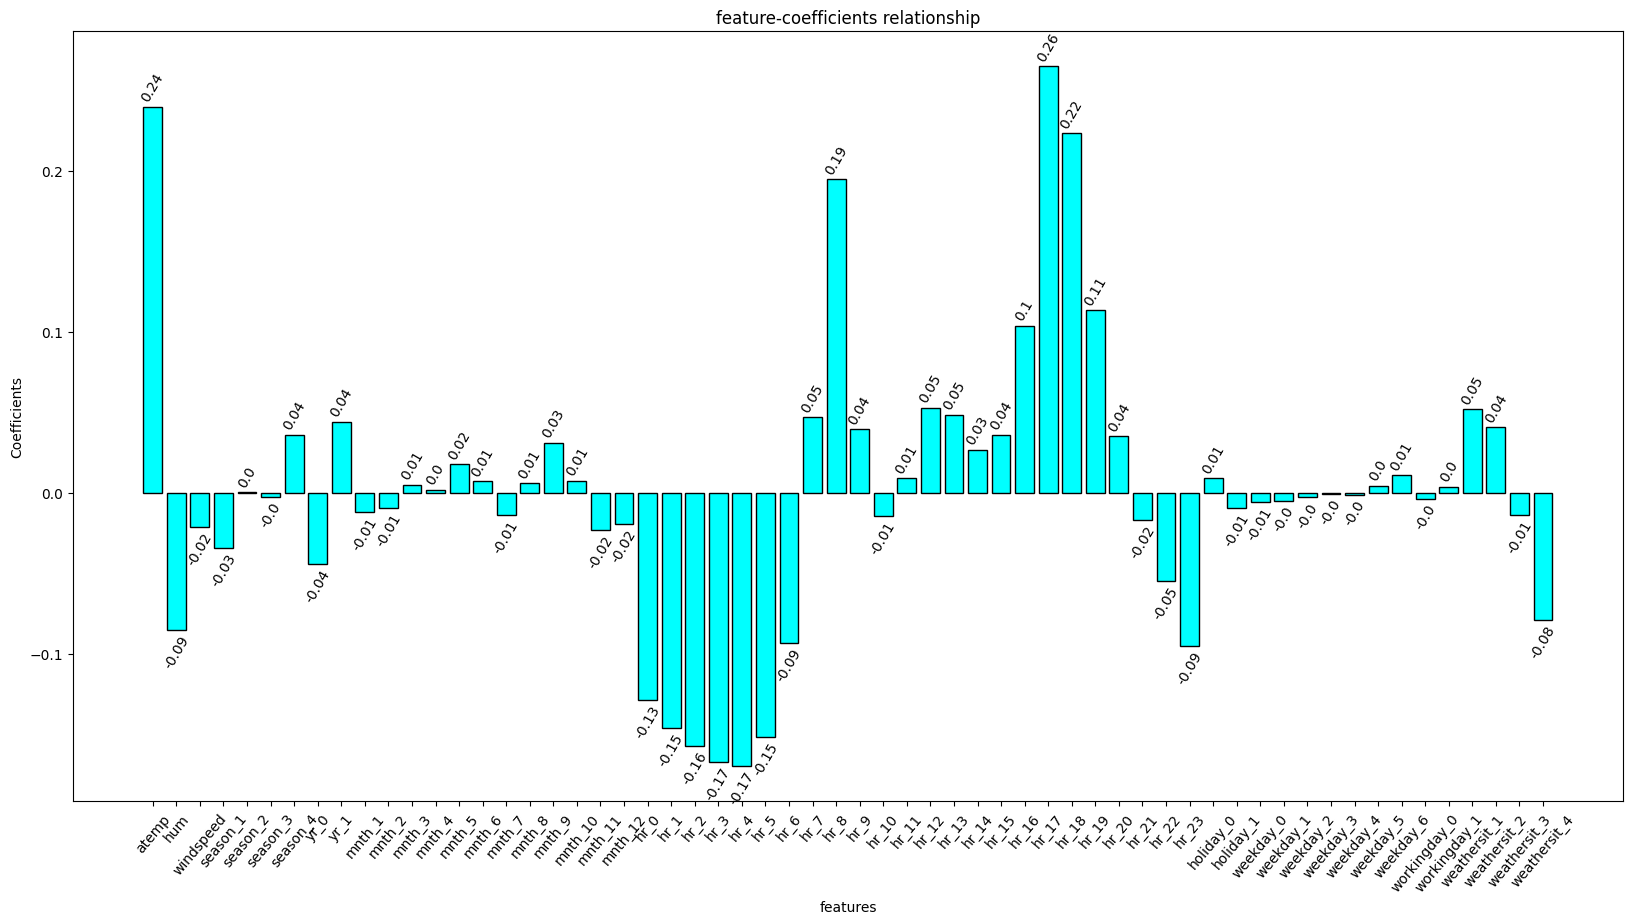

In [144]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(20, 10))
barplot = ax.bar(x_value, y_value, color='cyan', edgecolor='black')
ax.bar_label(barplot, labels = y_value.round(2), label_type='edge', padding=2, rotation=60)
ax.set_xticklabels(x_value, rotation=50)
ax.set_xlabel("features")
ax.set_ylabel("Coefficients")
ax.set_title("feature-coefficients relationship")
plt.show()


## Analysis


*   temp is important feature which has more impact on cnt
*   Task 1 showed that 17th and 18th hour are busiest time and coefficients also show that good impact on cnt



### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [145]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [151]:
# YOUR CODE HERE
alpha_error_result_dict = {}
intercept_dict, coefficient_dict, rmse_lasso_dict, r2_lasso_dict = {}, {}, {}, {}
for a in alpha:
    print("Lasso regularization for alpha : ", a)
    Lreg = linear_model.Lasso(alpha = a, random_state=42)
    Lreg.fit(X_train, y_train)
    y_pred_using_lasso = Lreg.predict(X_test)
    mse_using_lasso = mean_squared_error(y_test, y_pred_using_lasso)
    alpha_error_result_dict[a] = mse_using_lasso
    rmse_lasso_dict[a] = np.sqrt(mse_using_lasso)
    r2_lasso_dict[a] = r2_score(y_test, y_pred_using_lasso)
    intercept_dict[a] = Lreg.intercept_
    coefficient_dict[a] = Lreg.coef_

Lasso regularization for alpha :  0.0001
Lasso regularization for alpha :  0.001
Lasso regularization for alpha :  0.01
Lasso regularization for alpha :  0.1
Lasso regularization for alpha :  1
Lasso regularization for alpha :  10
Lasso regularization for alpha :  100


In [152]:
lasso_df = pd.DataFrame({"Alpha": alpha_error_result_dict.keys(), 'MSE':alpha_error_result_dict.values(), 'RMSE': rmse_lasso_dict.values(), 'R2 score': r2_lasso_dict.values() })
lasso_df = lasso_df.sort_values(by=['MSE'])
lasso_df

,Alpha,MSE,RMSE,R2 score
0,0.0001,0.010592,0.102918,0.681365
1,0.0010,0.011211,0.105882,0.662743
2,0.0100,0.028365,0.168421,0.146694
3,0.1000,0.033274,0.182413,-0.000980
4,1.0000,0.033274,0.182413,-0.000980
5,10.0000,0.033274,0.182413,-0.000980
6,100.0000,0.033274,0.182413,-0.000980


In [153]:
print(f"Alpha for least mean squared error : {lasso_df.loc[0, 'MSE']} --> ", lasso_df.loc[0, 'Alpha'])

print(f"Coefficients--> ",coefficient_dict[lasso_df.loc[0, 'Alpha']])

print(f"Intercept --> ",intercept_dict[lasso_df.loc[0, 'Alpha']])

Alpha for least mean squared error : 0.010592012326644761 -->  0.0001
Coefficients-->  [ 2.46859558e-01 -8.63119068e-02 -1.35310808e-02 -3.90912800e-02
  0.00000000e+00 -5.82404511e-04  3.07977904e-02 -8.79285974e-02
  1.34797379e-17 -7.03004191e-03 -4.68992922e-03  4.86299561e-03
 -0.00000000e+00  1.39391779e-02  2.23836042e-03 -1.80971196e-02
  0.00000000e+00  2.71038131e-02  9.44487484e-03 -1.80638360e-02
 -1.41475717e-02 -1.49196840e-01 -1.66421449e-01 -1.77181604e-01
 -1.87117720e-01 -1.89875863e-01 -1.71477584e-01 -1.13389124e-01
  2.19004177e-02  1.69607515e-01  1.37181473e-02 -3.54502262e-02
 -1.23242380e-02  2.66113025e-02  2.20907789e-02  0.00000000e+00
  9.37794174e-03  7.69491696e-02  2.38025368e-01  1.96410432e-01
  8.73992814e-02  9.28262369e-03 -3.74697227e-02 -7.56770915e-02
 -1.15487316e-01  2.32719266e-02 -2.02822759e-16 -1.11405457e-02
 -3.22555314e-03 -8.01122228e-04  3.20292492e-05  0.00000000e+00
  5.08156920e-03  4.15328477e-03 -1.23700446e-04  0.00000000e+00
  1

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [154]:
# YOUR CODE HERE

alpha_error_result_dict_using_ridge, rmse_ridge_dict, r2_ridge_dict = {}, {}, {}
intercept_dict_using_ridge, coefficient_dict_using_ridge = {}, {}
for a in alpha:
    print("Ridge regularization for alpha : ", a)
    rdg = linear_model.Ridge(alpha = a, random_state=42)
    rdg.fit(X_train, y_train)
    y_pred_using_ridge = rdg.predict(X_test)
    mse_using_ridge = mean_squared_error(y_test, y_pred_using_ridge)
    alpha_error_result_dict_using_ridge[a] = mse_using_ridge
    rmse_ridge_dict[a] =np.sqrt(mse_using_ridge)
    intercept_dict_using_ridge[a] = rdg.intercept_
    coefficient_dict_using_ridge[a] = rdg.coef_
    r2_ridge_dict[a]=r2_score(y_test, y_pred_using_ridge)

Ridge regularization for alpha :  0.0001
Ridge regularization for alpha :  0.001
Ridge regularization for alpha :  0.01
Ridge regularization for alpha :  0.1
Ridge regularization for alpha :  1
Ridge regularization for alpha :  10
Ridge regularization for alpha :  100


In [158]:
ridge_df = pd.DataFrame({"Alpha": alpha_error_result_dict_using_ridge.keys(), 'MSE':alpha_error_result_dict_using_ridge.values(), 'RMSE': rmse_ridge_dict.values(), 'R2 score': r2_ridge_dict.values() })
ridge_df = ridge_df.sort_values(by=['MSE'])
ridge_df

,Alpha,MSE,RMSE,R2 score
4,1.0000,0.010601,0.102959,0.681108
5,10.0000,0.010601,0.102962,0.681090
3,0.1000,0.010603,0.102972,0.681031
2,0.0100,0.010604,0.102973,0.681019
1,0.0010,0.010604,0.102974,0.681018
0,0.0001,0.010604,0.102974,0.681018
6,100.0000,0.010949,0.104637,0.670628


In [163]:
ridge_df.iloc[0]['Alpha']

1.0

In [165]:
print(f"Alpha for least mean squared error : {ridge_df.iloc[0]['MSE']} --> ", ridge_df.iloc[0]['Alpha'])
print(f"Coefficients--> ",coefficient_dict_using_ridge[ridge_df.iloc[0]['Alpha']])
print(f"Intercept --> ",intercept_dict_using_ridge[ridge_df.iloc[0]['Alpha']])

Alpha for least mean squared error : 0.010600557562836217 -->  1.0
Coefficients-->  [ 0.23806711 -0.08543906 -0.02117745 -0.03420071  0.00030463 -0.0021973
  0.03609339 -0.04421337  0.04421337 -0.01225858 -0.00961737  0.00486333
  0.00189149  0.01807891  0.00762609 -0.01326238  0.00605752  0.03126639
  0.00766264 -0.02292745 -0.01938059 -0.12860493 -0.14592552 -0.15661326
 -0.16695343 -0.16953771 -0.15118479 -0.09321386  0.04685642  0.19450148
  0.03923583 -0.01435911  0.00896637  0.05278994  0.048475    0.02668
  0.03610985  0.10364501  0.26424782  0.22264391  0.11331368  0.03514955
 -0.016566   -0.05486369 -0.09479257  0.00912321 -0.00912321 -0.00580875
 -0.0049248  -0.00285608 -0.00054663 -0.00127657  0.00434754  0.0110653
 -0.00386666  0.00386666  0.04469967  0.03351873 -0.02102272 -0.05719568]
Intercept -->  0.09145352326281277


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [166]:
# YOUR CODE HERE
alpha_error_result_dict_using_elastic, rmse_elastic_dict, r2_elastic_dict = {}, {}, {}
intercept_dict_using_elastic, coefficient_dict_using_elastic = {}, {}
for a in alpha:
    print("Ridge regularization for alpha : ", a)
    ENreg = linear_model.ElasticNet(alpha = a)
    ENreg.fit(X_train, y_train)
    y_pred_using_elastic = ENreg.predict(X_test)
    mse_using_elastic = mean_squared_error(y_test, y_pred_using_elastic)
    alpha_error_result_dict_using_elastic[a] = mse_using_elastic
    intercept_dict_using_elastic[a] = ENreg.intercept_
    coefficient_dict_using_elastic[a] = ENreg.coef_
    r2_elastic_dict[a] = r2_score(y_test, y_pred_using_elastic)
    rmse_elastic_dict[a] = np.sqrt(mse_using_elastic)

Ridge regularization for alpha :  0.0001
Ridge regularization for alpha :  0.001
Ridge regularization for alpha :  0.01
Ridge regularization for alpha :  0.1
Ridge regularization for alpha :  1
Ridge regularization for alpha :  10
Ridge regularization for alpha :  100


In [167]:
elastic_df = pd.DataFrame({"Alpha": alpha_error_result_dict_using_elastic.keys(), 'MSE':alpha_error_result_dict_using_elastic.values(), 'RMSE': rmse_elastic_dict.values(), 'R2 score': r2_elastic_dict.values() })
elastic_df = elastic_df.sort_values(by=['MSE'])
elastic_df

,Alpha,MSE,RMSE,R2 score
0,0.0001,0.010592,0.102916,0.681377
1,0.0010,0.010789,0.103870,0.675440
2,0.0100,0.019729,0.140461,0.406492
3,0.1000,0.033274,0.182413,-0.000980
4,1.0000,0.033274,0.182413,-0.000980
5,10.0000,0.033274,0.182413,-0.000980
6,100.0000,0.033274,0.182413,-0.000980


In [168]:
print(f"Alpha for least mean squared error : {elastic_df.iloc[0]['MSE']} --> ", elastic_df.iloc[0]['Alpha'])
print(f"Coefficients--> ",coefficient_dict_using_elastic[elastic_df.iloc[0]['Alpha']])
print(f"Intercept --> ",intercept_dict_using_elastic[elastic_df.iloc[0]['Alpha']])

Alpha for least mean squared error : 0.010591626268855648 -->  0.0001
Coefficients-->  [ 2.42583129e-01 -8.59624480e-02 -1.73870849e-02 -3.63912212e-02
  1.05762233e-04 -6.16632321e-04  3.39344415e-02 -8.14235521e-02
  6.75401520e-03 -1.11926394e-02 -8.63237336e-03  3.48651432e-03
 -0.00000000e+00  1.48063143e-02  3.43748629e-03 -1.77221242e-02
  7.63860501e-04  2.72384610e-02  6.82812643e-03 -2.22089273e-02
 -1.83839145e-02 -1.37145425e-01 -1.54413978e-01 -1.65128200e-01
 -1.75243228e-01 -1.77924537e-01 -1.59558484e-01 -1.01546958e-01
  3.60910895e-02  1.83714955e-01  2.81873554e-02 -2.31871733e-02
 -0.00000000e+00  4.13945520e-02  3.69676709e-02  1.49989787e-02
  2.44337900e-02  9.18933770e-02  2.52748944e-01  2.11086052e-01
  1.02037713e-01  2.39214723e-02 -2.52929283e-02 -6.35242420e-02
 -1.03380166e-01  1.43059286e-02 -9.33089061e-03 -1.07052108e-02
 -3.44847229e-03 -1.18921516e-03  3.65300448e-04 -0.00000000e+00
  5.36019012e-03  5.37240523e-03 -1.00883433e-03  4.37823444e-05
  1

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [169]:
df_encoded.columns

Index(['atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [170]:
#Consider casual and registered as target

targets = ['casual']
X = df_encoded.drop(['cnt', 'registered', 'casual'], axis=1)
y = df_encoded[['casual']]

X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cas.shape, X_test_cas.shape, y_train_cas.shape, y_test_cas.shape


((13903, 60), (3476, 60), (13903, 1), (3476, 1))

In [173]:
lin_reg_cas = LinearRegression()
lin_reg_cas.fit(X_train_cas, y_train_cas)
coefficients_cas = lin_reg_cas.coef_

print("Metrics when casual is considered as target")
print("Linear Regression Bias: ", lin_reg_cas.intercept_)
print("Linear Regression Coefficents/Weights  : ", coefficients_cas)

y_pred_using_model_cas = lin_reg_cas.predict(X_test_cas)
msecas = mean_squared_error(y_test_cas, y_pred_using_model_cas)
rmsecas = np.sqrt(msecas)
r2_score_cas = r2_score(y_test_cas, y_pred_using_model_cas)

cas_df = pd.DataFrame({"MSE": [msecas], "RMSE": rmsecas, "R2 Score": [r2_score_cas]})
cas_df

Metrics when casual is considered as target
Linear Regression Bias:  [0.03211634]
Linear Regression Coefficents/Weights  :  [[ 0.24458532 -0.07600036 -0.03150772 -0.00781231  0.01585894 -0.0035235
  -0.00452313 -0.01656002  0.01656002 -0.01587249 -0.02030177  0.00752085
   0.00347556  0.0121973  -0.00956558 -0.01266059  0.00127873  0.01943453
   0.02542182  0.00295648 -0.01388484 -0.0614858  -0.06682602 -0.06904579
  -0.07649602 -0.07802344 -0.07141994 -0.06440079 -0.04614221 -0.02236405
  -0.00535927  0.03010453  0.05748097  0.07884082  0.08483428  0.0805714
   0.08123448  0.08189822  0.09030518  0.05497927  0.02437699 -0.00135738
  -0.02022251 -0.03290514 -0.04857777  0.0054305  -0.0054305   0.0112872
  -0.00595087 -0.01372308 -0.01448018 -0.01388121  0.00854011  0.02820803
   0.03406473 -0.03406473  0.01573894  0.00438689 -0.01551444 -0.00461138]]


,MSE,RMSE,R2 Score
0,0.007106,0.084296,0.583481


In [174]:
targets = ['registered']
X = df_encoded.drop(['cnt', 'registered', 'casual'], axis=1)
y = df_encoded[['registered']]

X_train_regd, X_test_regd, y_train_regd, y_test_regd = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_regd.shape, X_test_regd.shape, y_train_regd.shape, y_test_regd.shape


((13903, 60), (3476, 60), (13903, 1), (3476, 1))

In [176]:
lin_reg_regd = LinearRegression()
lin_reg_regd.fit(X_train_regd, y_train_regd)
coefficients_regd = lin_reg_regd.coef_

print("Metrics when registered is considered as target")
print("Linear Regression Bias: ", lin_reg_regd.intercept_)
print("Linear Regression Coefficents/Weights  : ", coefficients_regd)

y_pred_using_model_regd = lin_reg_regd.predict(X_test_regd)
mseregd = mean_squared_error(y_test_regd, y_pred_using_model_regd)
rmseregd = np.sqrt(mseregd)
r2_score_regd = r2_score(y_test_regd, y_pred_using_model_regd)
regd_df = pd.DataFrame({"MSE": [mseregd], "RMSE": rmseregd, "R2 Score": [r2_score_regd]})
regd_df

Metrics when registered is considered as target
Linear Regression Bias:  [0.07955923]
Linear Regression Coefficents/Weights  :  [[ 0.16268873 -0.06228637 -0.01054282 -0.03438248 -0.00627108 -0.00104989
   0.04170346 -0.04184363  0.04184363 -0.00651906 -0.00192249  0.00241089
   0.00073238  0.0147265   0.01214478 -0.00969858  0.00590482  0.02624227
  -0.00218608 -0.02638598 -0.01544946 -0.11644003 -0.13333026 -0.14419652
  -0.15254426 -0.15474009 -0.13720512 -0.0761365   0.07086642  0.22391705
   0.04552941 -0.0283092  -0.01393418  0.02556376  0.018309   -0.00397835
   0.00614437  0.0804518   0.25414419  0.22294478  0.11491647  0.03933461
  -0.00991929 -0.04691425 -0.08447381  0.00782521 -0.00782521 -0.0110734
  -0.00295244  0.0025087   0.00539366  0.00433047  0.00126346  0.00052954
  -0.01836908  0.01836908  0.05073538  0.04308926 -0.00879228 -0.08503235]]


,MSE,RMSE,R2 Score
0,0.00912,0.095498,0.675685


## Analysis

*   RMSE when cnt is considered: 0.10297363845525402
*   RMSE when casual is considered: 0.0843
*   RMSE when registered is considered: 0.0955

RMSE for cnt > RMSE for registered > RMSE for casual

cnt is summartion of registered and casual.

More or less, RMSE variance among three is less



### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.

Three methods are used:

First directly solving the normal equation

Second: lstsq (linear algebra library)

Third : Using sklearn Linear Regression

* Comment on performance of the algorithms/methods used.

All three almost showed the similar performance

* Comment about the nature of the data and fitment of linear regression for this data.

* Can you perform a non linear curve fitting using linear regression? If yes, How?

Non linear curve fitting can be done using Polynomial Regression.